<a href="https://colab.research.google.com/github/fakhar-iqbal/Machine_Learning_Fundamentals/blob/main/Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

##**The Law of Large Numbers**

In [2]:
ns = np.array([2,4,8,16,32,64,128,256,512,1024,2048,4096])


In [3]:
np.random.seed(42)

In [4]:
np.random.binomial(1,0.5)

0

In [5]:
head_counts = [np.random.binomial(n,0.5) for n in ns]
head_counts

[2, 3, 4, 6, 13, 27, 54, 136, 258, 509, 1038, 2094]

In [6]:
proportion_head = head_counts/ns

proportion_head

array([1.        , 0.75      , 0.5       , 0.375     , 0.40625   ,
       0.421875  , 0.421875  , 0.53125   , 0.50390625, 0.49707031,
       0.50683594, 0.51123047])

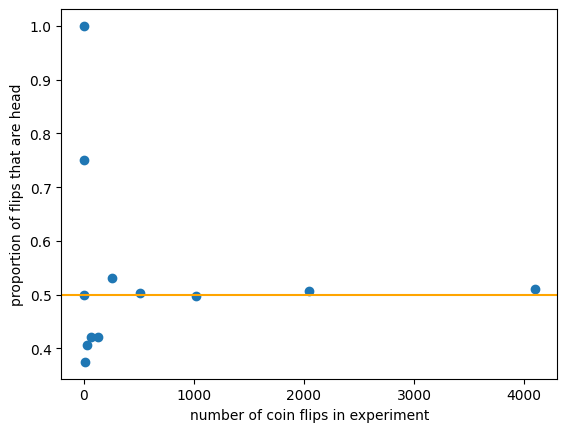

In [7]:
fig,ax = plt.subplots()

plt.xlabel('number of coin flips in experiment')
plt.ylabel('proportion of flips that are head')

plt.axhline(0.5,color='orange')
_ = ax.scatter(ns,proportion_head)

##**Statistics**

The field of statistics applies probability theory to make inference with a quantifiable degree of confidence

In [8]:
n_exp = 1000
head_count = np.random.binomial(5,0.5,n_exp)

we can plot the results of our experiments to create a probability distribution

In [9]:
heads,event_count = np.unique(head_count,return_counts=True)


In [10]:
heads

array([0, 1, 2, 3, 4, 5])

In [11]:
event_count

array([ 33, 181, 285, 313, 160,  28])

In [12]:
event_prob = event_count/n_exp

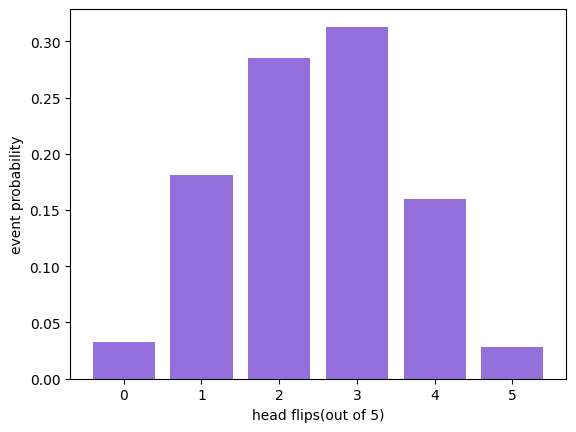

In [13]:
plt.bar(heads,event_prob,color='mediumpurple')
plt.xlabel("head flips(out of 5)")
_ = plt.ylabel('event probability')

##**Expected Value**

In [14]:
from math import factorial

In [15]:
def coinflip_prob(n,k):
  n_choose_k = factorial(n)/(factorial(k)*factorial(n-k))
  return n_choose_k/2**n

In [16]:
coinflip_prob(5,0)

0.03125

In [17]:
P = [coinflip_prob(5,x) for x in range(6)]
P

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

In [18]:
E = sum([P[x]*x for x in range(6)])
E

2.5

In [19]:
coinflip_prob(1,1)

0.5

In [20]:
x = st.skewnorm.rvs(0,size=1000)  #first argument is skewness. 0 means no skew


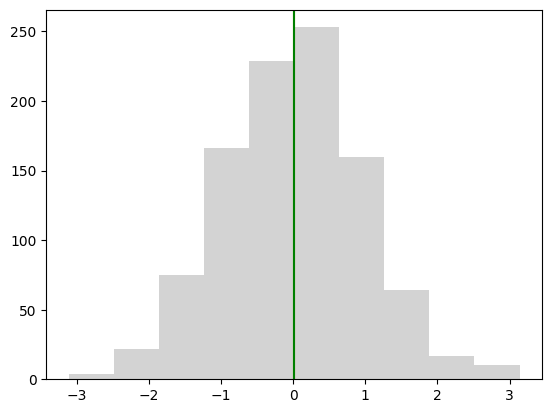

In [21]:
fig,ax = plt.subplots()
plt.axvline(x= np.mean(x),color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x,color='lightgray')

##mode typically applies to PMFs, but this is PDFs

skewed disribution

In [25]:
x = st.skewnorm.rvs(10,size=1000)


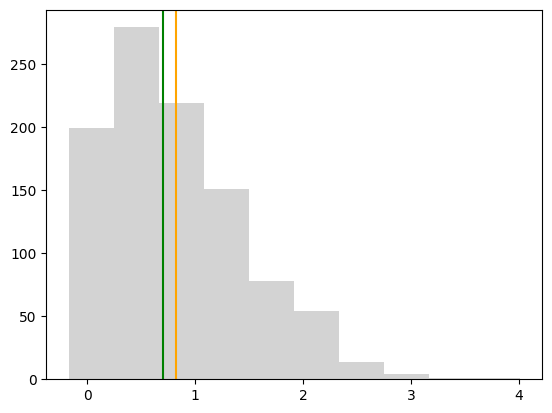

In [26]:
fig,ax = plt.subplots()
plt.axvline(x= np.mean(x),color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x,color='lightgray')

##Quantiles

### The median, which divides a distribution in two at its midpoint, is most well known example of quantile

In [27]:
np.median(x)

0.6987365121323832

In [28]:
np.quantile(x,0.5)

0.6987365121323832

##Percentile
### Percentiles divide the distribution at any point outof one hundred. eg if we'd like to identify a threshold of top 5% of a distribution, we cut it at the 95% percentile.

In [29]:
p = np.percentile(x,[95,99])
p

array([2.06249928, 2.51830108])

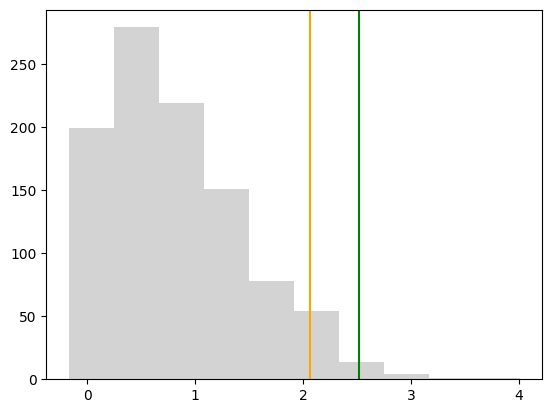

In [30]:
fig,ax = plt.subplots()
plt.axvline(x=p[0],color='orange')
plt.axvline(x=p[1],color='green')

_ = plt.hist(x,color='lightgray')

In [31]:
np.quantile(x,[.95,.99])

array([2.06249928, 2.51830108])

## Quartiles
### Quartiles as the name suggests are the quantiles that divide distribution into quarters by splitting them at 25th, median 50th, 75th percentile

In [32]:
q = np.percentile(x,[25,50,75])
q

array([0.32494046, 0.69873651, 1.19431522])

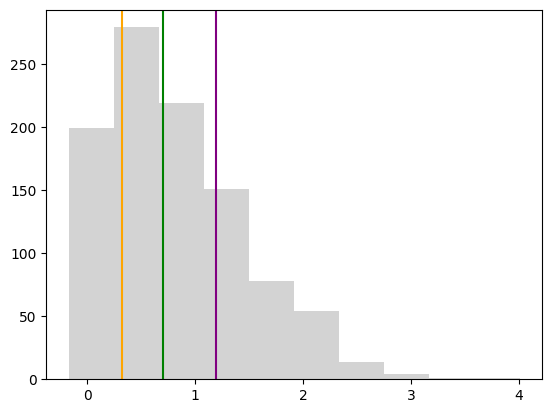

In [33]:
fig,ax = plt.subplots()
plt.axvline(q[0],color='orange')
plt.axvline(q[1],color='green')
plt.axvline(q[2], color='purple')

_ = ax.hist(x,color='lightgray')

##Deciles
### deciles divide the distribution into ten evenly-sized segments

In [34]:
d = np.percentile(x,range(10,100,10))
d

array([0.11871856, 0.24991108, 0.3992659 , 0.53290322, 0.69873651,
       0.86771624, 1.08994827, 1.30781239, 1.75782249])

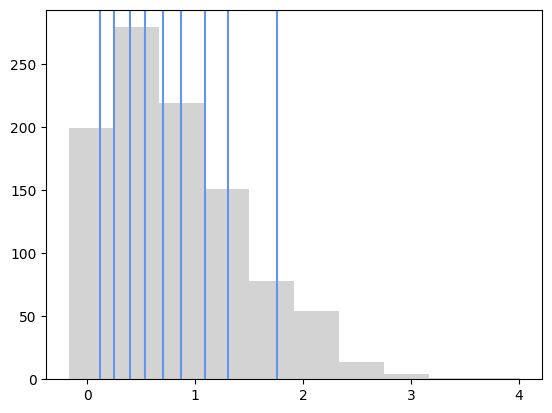

In [35]:
fig,ax = plt.subplots()
[plt.axvline(i, color='cornflowerblue') for i in d]
_ = plt.hist(x,color='lightgray')